# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [304]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# import scipy
# import sklearn

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [305]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [306]:
# CÉLULA PARA ANÁLISE DOS ATRIBUTOS 
# checando valores possíveis para as colunas para análise dos atributos

# display(df_train_id["CLASSE"].str.lower().unique())

# null_mask = df_dataset["IDADE"].isnull()
# display(df_dataset[pd.to_datetime(df_dataset['Atendimento'], errors='coerce').isna()])


##### Análise dos atributos

* **Id**: Identificação do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes
    * tratamento por média
    * REMOVIDA:

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)
    * tratamento por média
    * REMOVIDA:

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0
    * tratamento por média

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos
    * tratamento por média

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento
    * REMOVIDA:

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes
    * tratamento por média

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 
    * tratamento por média

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
    * tratamento por média

* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis


#### Exploração dos dados com estatística descritiva

Resumo quantitativo das principais características de um conjunto de dados:
* Frequência
* Localização ou tendência central
* Dispersão ou espalhamento
* Distribuição ou formato

Os três últimos são utilizados geralmente para valores numéricos.

Para dados univariados: 
* Medidas de localidade: moda, média, mediana, média truncada, quartis, percentil (boxplot)
* Medidas de espalhamento: intervalo, variância e descio padrão
* Medidas de distribuição: obliquidade ou assimetria e curtose (histograma e gráfico pizza)

Para dados multivariados:
* Medidas de localidade: calculado para cada atributo separadamente
* Medidas de espalhamento: calculado apra cada atributo separadamente + covariância e correlação (matriz de covariância ou correlação)

In [307]:
print("Registros de treino fornecidos: ", df_train_id.shape)

# recuperar as partições de treino por Id e concatenar o coluna alvo CLASSE
df_train = pd.merge(df_dataset, df_train_id, on='Id')


Registros de treino fornecidos:  (14727, 2)


In [308]:
# ANÁLISE DE VALORES FALTANTES
from scripts.analise_exploratoria import *

analise_valores_faltantes(df_train)

Relação de atributos e porcentagem de nulos: 
Id                0.000000
Peso              1.765465
Altura            0.000000
IMC              27.276431
Atendimento       6.674815
DN                9.343383
IDADE             9.343383
Convenio         30.508590
PULSOS            8.093977
PA SISTOLICA     44.102669
PA DIASTOLICA    44.170571
PPA               1.337679
B2                7.992123
SOPRO             7.910640
FC               12.867522
HDA 1            31.330210
HDA2             96.340056
SEXO              0.020371
MOTIVO1           7.285937
MOTIVO2          27.561622
CLASSE            7.931011
dtype: float64


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [309]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

df_train = df_train.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)

In [310]:
# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS

from scripts.preprocessamento import *

# col_numerica = ['Id', 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_numerica = ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'PPA', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2']

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
    # identificando valores fora do intervalo aceitável
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_train['PPA'] = df_train['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)
        # CLASSE
valores_validos_0 = ['Normal', 'Normais']
valores_validos_1 = ['Anormal']
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in valores_validos_0 else 1 if x in valores_validos_1 else np.nan)

# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0)
print("Registros de treino classificados: ", df_train.shape)

Registros de treino classificados:  (13559, 15)


In [311]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

remover_registros_incompletos(df_train, 0.5)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

Conjunto de treino sem registros com baixa taxa de preenchimento:  (13559, 15)


In [312]:
# PREENCHER FALTANTES 

# NUMÉRICOS COM MÉDIA
df_train[col_numerica] = preencher_faltantes(df_train[col_numerica], 'mean')

# CATEGÓRICOS COM MODA
df_train[col_categorica] = preencher_faltantes(df_train[col_categorica], 'most_frequent')


In [313]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (13225, 15)


In [314]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train)
print("Registros de treino sem inconsistências: ", df_train.shape)


Registros de treino sem inconsistências:  (13205, 15)


In [315]:
# GERAR INFORMAÇÃO SOBRE OS ATRIBUTOS CATEGÓRICOS

for coluna in col_categorica:
    display(df_train[coluna].value_counts(dropna=False))

PULSOS
normais                13071
amplos                    46
outro                     38
femorais diminuidos       36
diminuídos                14
Name: count, dtype: int64

PPA
normal                 12462
pre-hipertensão pad      182
has-2 pas                168
pre-hipertensão pas      158
has-1 pas                118
has-1 pad                 69
has-2 pad                 48
Name: count, dtype: int64

B2
normal           12622
hiperfonética      273
desdob fixo        156
outro               83
única               71
Name: count, dtype: int64

SOPRO
ausente                   8487
sistólico                 4665
contínuo                    42
diastólico                   8
sistolico e diastólico       3
Name: count, dtype: int64

HDA 1
assintomático      10627
dor precordial       696
dispneia             626
palpitacao           473
cianose              251
desmaio/tontura      223
outro                170
ganho de peso        139
Name: count, dtype: int64

SEXO
m    7869
f    5336
Name: count, dtype: int64

MOTIVO1
5 - parecer cardiológico           6383
6 - suspeita de cardiopatia        4548
1 - cardiopatia já estabelecida    1094
2 - check-up                        819
7 - outro                           361
Name: count, dtype: int64

MOTIVO2
5 - cirurgia                           6363
6 - sopro                              2291
1 - cardiopatia congenica               981
outro                                   878
5 - atividade física                    846
6 - dor precordial                      514
6 - palpitação/taquicardia/arritmia     445
6 - has/dislipidemia/obesidade          332
6 - dispnéia                            265
6 - cianose                             124
1 - cardiopatia adquirida               100
6 - cardiopatia na familia               41
6 - cansaço                              13
5 - uso de cisaprida                      5
6 - alterações de pulso/perfusão          4
6 - cianose e dispnéia                    3
Name: count, dtype: int64

In [316]:
# GERAR ESTATÍSTICA DO CONJUNTO ANTES DA REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)


,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13205.000000,13205.000000,13205.000000,13205,13205.000000,13205.000000,13205,13205,13205,13205.000000,13205,13205,13205,13205,13205.000000
unique,NaN,NaN,NaN,5,NaN,NaN,7,5,5,NaN,8,2,5,16,NaN
top,NaN,NaN,NaN,normais,NaN,NaN,normal,normal,ausente,NaN,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,13071,NaN,NaN,12462,12622,8487,NaN,10627,7869,6383,6363,NaN
mean,8910.924574,17.813908,6.494125,NaN,101.402094,62.382934,NaN,NaN,NaN,93.926458,NaN,NaN,NaN,NaN,0.400984
std,5161.882487,10.072527,4.845970,NaN,11.788520,7.039332,NaN,NaN,NaN,109.348234,NaN,NaN,NaN,NaN,0.490116
min,2.000000,0.000000,0.010000,NaN,10.000000,6.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000
25%,4420.000000,16.000000,2.630000,NaN,100.000000,60.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,0.000000
50%,8881.000000,17.791735,6.300000,NaN,101.392336,62.373203,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,0.000000
75%,13365.000000,19.000000,9.830000,NaN,101.392336,62.373203,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,1.000000


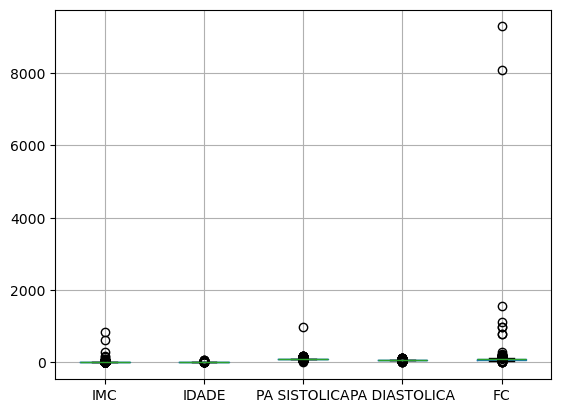

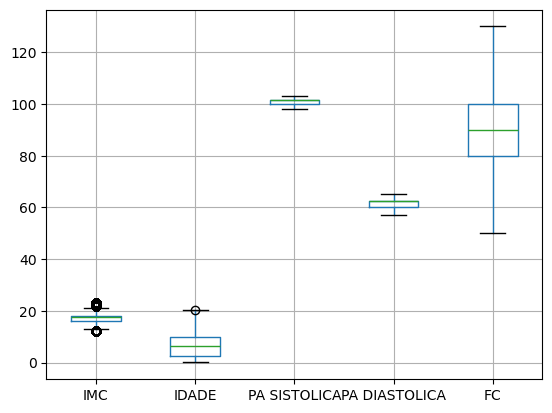

Relação de atributos e porcentagem de nulos: 
Id                0.000000
IMC               7.186672
IDADE             0.484665
PULSOS            0.000000
PA SISTOLICA     36.213555
PA DIASTOLICA    27.262401
PPA               0.000000
B2                0.000000
SOPRO             0.000000
FC                2.991291
HDA 1             0.000000
SEXO              0.000000
MOTIVO1           0.000000
MOTIVO2           0.000000
CLASSE            0.000000
dtype: float64
0 de 13205 (0.0%) registros com mais de 50.0% dos atributos não preenchidos
Relação de atributos e porcentagem de nulos: 
Id               0.0
IMC              0.0
IDADE            0.0
PULSOS           0.0
PA SISTOLICA     0.0
PA DIASTOLICA    0.0
PPA              0.0
B2               0.0
SOPRO            0.0
FC               0.0
HDA 1            0.0
SEXO             0.0
MOTIVO1          0.0
MOTIVO2          0.0
CLASSE           0.0
dtype: float64


In [317]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS
# identificação de outliers por atributo 

# por boxplot
df_train.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()


df_train = invalidar_outliers_quartil(df_train, ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])

df_train.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()

analise_valores_faltantes(df_train)


# exlusão dos registros que, após marcados como outliers, possuem menos de 50% dos valores preenchidos 
faltantes = analise_registro_incompleto(df_train, 0.5)
df_train = df_train[~faltantes]


# peenchimento dos valores nulos com média
df_train[col_numerica] = preencher_faltantes(df_train[col_numerica], 'mean')
analise_valores_faltantes(df_train)

In [318]:
# GERA ESTATÍSTICA DO CONJUNTO PÓS REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13205.000000,13205.000000,13205.000000,13205,13205.000000,13205.000000,13205,13205,13205,13205.000000,13205,13205,13205,13205,13205.000000
unique,NaN,NaN,NaN,5,NaN,NaN,7,5,5,NaN,8,2,5,16,NaN
top,NaN,NaN,NaN,normais,NaN,NaN,normal,normal,ausente,NaN,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,13071,NaN,NaN,12462,12622,8487,NaN,10627,7869,6383,6363,NaN
mean,8910.924574,17.268902,6.381051,NaN,100.833153,61.500744,NaN,NaN,NaN,90.652684,NaN,NaN,NaN,NaN,0.400984
std,5161.882487,2.147856,4.516143,NaN,0.552101,1.201757,NaN,NaN,NaN,13.206082,NaN,NaN,NaN,NaN,0.490116
min,2.000000,12.000000,0.010000,NaN,98.000000,57.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,0.000000
25%,4420.000000,16.000000,2.630000,NaN,100.000000,60.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,0.000000
50%,8881.000000,17.268902,6.300000,NaN,100.833153,61.500744,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,0.000000
75%,13365.000000,18.000000,9.740000,NaN,101.392336,62.373203,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,1.000000


In [319]:
# IDENTIFICAR OUTLIERS CONSIDERANDO TODOS OS ATRIBUTOS
# identificação de outliers por registro 
# uma estratégia é a aplicação do PCA para redução de dimensionalidade 

In [320]:
# CONVERTER SIMBÓLICO-NUMÉRICO

cat_ppa = ['normal', 'pre-hipertensão pas', 'pre-hipertensão pad', 'has-1 pas', 'has-1 pad', 'has-2 pas', 'has-2 pad']
cat_sopro = ['ausente', 'sistólico', 'diastólico', 'contínuo', 'sistolico e diastólico']

df_train = converter_ordinais(df_train, ["PPA", "SOPRO"], [cat_ppa, cat_sopro])

# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns='CLASSE')

df_train = converter_nominais(df_train, ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"])

# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, classes], axis=1)


In [321]:
# NORMALIZAR ATRIBUTOS

df_train = normalizar(df_train, True)
display(df_train)


,Id,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,PPA,SOPRO,FC,PULSOS_amplos,PULSOS_diminuídos,...,MOTIVO2_6 - cardiopatia na familia,MOTIVO2_6 - cianose,MOTIVO2_6 - cianose e dispnéia,MOTIVO2_6 - dispnéia,MOTIVO2_6 - dor precordial,MOTIVO2_6 - has/dislipidemia/obesidade,MOTIVO2_6 - palpitação/taquicardia/arritmia,MOTIVO2_6 - sopro,MOTIVO2_outro,CLASSE
0,2,-1.521994,-1.408567e+00,1.012866,7.260136e-01,-0.214122,-0.722996,2.828146,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,6.987860,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,1.0
1,3,0.243430,2.084294e-02,1.012866,7.260136e-01,-0.214122,1.258155,-0.200876,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,1.0
2,4,0.805996,-1.302278e+00,1.012866,7.260136e-01,-0.214122,-0.722996,0.102026,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,1.0
3,6,1.737192,-4.386765e-01,-1.509118,-1.248839e+00,-0.214122,-0.722996,0.707831,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,1.0
4,7,0.340398,1.441317e+00,1.012866,7.260136e-01,-0.214122,-0.722996,0.404928,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,17868,-1.056396,-9.391225e-01,0.000000,-5.912755e-15,-0.214122,-0.722996,0.707831,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,0.0
14723,17869,-0.590798,-1.147273e+00,1.012866,7.260136e-01,-0.214122,-0.722996,0.102026,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,0.0
14724,17871,1.737192,-1.966749e-16,0.000000,-5.912755e-15,-0.214122,-0.722996,-1.109583,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,-0.201249,-0.160594,-0.186747,-0.458164,-0.266882,0.0
14725,17872,-1.056396,2.084294e-02,0.000000,-5.912755e-15,-0.214122,1.258155,0.260045,-0.059124,-0.032578,...,-0.055808,-0.097362,-0.015074,-0.143105,4.968970,-0.160594,-0.186747,-0.458164,-0.266882,0.0


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [322]:
# Importar dados de id dos testes
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

# Associar IDs dos testes a base de dados
df_test =  pd.merge(df_dataset, df_test_id, on='Id')

# Retirar colunas defasadas
df_test = df_test.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)


In [323]:

# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS DE TESTES

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
    # identificando valores fora do intervalo aceitável
df_test['IDADE'] = df_test['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_test[col_categorica] = padronizar_string(df_test, col_categorica)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_test['PPA'] = df_test['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)

for coluna in col_categorica:
    display(df_test[coluna].value_counts(dropna=False))


PULSOS
normais                3114
amplos                   12
femorais diminuidos       7
NaN                       6
outro                     6
diminuídos                1
Name: count, dtype: int64

PPA
NaN                    1731
normal                 1224
pre-hipertensão pad      51
has-2 pas                45
pre-hipertensão pas      34
has-1 pas                34
has-1 pad                17
has-2 pad                10
Name: count, dtype: int64

B2
normal           3018
hiperfonética      59
desdob fixo        33
outro              21
única              13
NaN                 2
Name: count, dtype: int64

SOPRO
ausente       2004
sistólico     1127
contínuo         9
diastólico       4
NaN              2
Name: count, dtype: int64

HDA 1
assintomático      1777
NaN                 800
dor precordial      174
dispneia            130
palpitacao          100
cianose              44
desmaio/tontura      43
ganho de peso        41
outro                37
Name: count, dtype: int64

SEXO
m      1795
f      1265
NaN      86
Name: count, dtype: int64

MOTIVO1
5 - parecer cardiológico           1489
6 - suspeita de cardiopatia        1065
1 - cardiopatia já estabelecida     291
2 - check-up                        206
7 - outro                            71
NaN                                  24
Name: count, dtype: int64

MOTIVO2
5 - cirurgia                           783
NaN                                    719
6 - sopro                              567
1 - cardiopatia congenica              244
5 - atividade física                   213
outro                                  169
6 - palpitação/taquicardia/arritmia    126
6 - dor precordial                     110
6 - has/dislipidemia/obesidade          78
6 - dispnéia                            57
6 - cianose                             33
1 - cardiopatia adquirida               30
6 - cardiopatia na familia               8
6 - cansaço                              4
5 - uso de cisaprida                     4
6 - alterações de pulso/perfusão         1
Name: count, dtype: int64

In [324]:

# PREENCHER FALTANTES 

df_test[col_numerica] = preencher_teste(df_test[col_numerica], df_detalhes.loc['mean', col_numerica].values)
display(df_detalhes.loc['top', col_categorica].values)
display(df_detalhes.columns)
display(df_test['B2'].value_counts(dropna=False))

df_test[col_categorica] = preencher_teste(df_test[col_categorica], df_detalhes.loc['top', col_categorica].values)
display(df_test['B2'].value_counts(dropna=False))


array(['normais', 'normal', 'normal', 'ausente', 'assintomático', 'm',
       '5 - parecer cardiológico', '5 - cirurgia'], dtype=object)

Index(['Id', 'IMC', 'IDADE', 'PULSOS', 'PA SISTOLICA', 'PA DIASTOLICA', 'PPA',
       'B2', 'SOPRO', 'FC', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2', 'CLASSE'],
      dtype='object')

B2
normal           3018
hiperfonética      59
desdob fixo        33
outro              21
única              13
NaN                 2
Name: count, dtype: int64

B2
normal           3018
hiperfonética      59
desdob fixo        33
outro              21
única              13
normais             2
Name: count, dtype: int64

In [325]:
# CONVERTER SIMBÓLICO-NUMÉRICO
display(df_test['PPA'])

df_test = converter_ordinais(df_test, ["PPA", "SOPRO"], [cat_ppa, cat_sopro])

df_test = converter_nominais(df_test, ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"])


0       normais
1        normal
2       normais
3       normais
4        normal
         ...   
3141    normais
3142    normais
3143    normais
3144    normais
3145    normais
Name: PPA, Length: 3146, dtype: object

ValueError: Found unknown categories ['normais'] in column 0 during fit

In [975]:
# NORMALIZAR ATRIBUTOS
df_test = normalizar(df_test, False)
display(df_test)

In [ ]:
# GUARDAR DATAFRAME EM MATRIZES

X = df_train.iloc[:, :-1].values
Y = df_train.iloc[:, -1].values

df_test_id

,Id
0,8957
1,4246
2,9089
3,10606
4,9863
...,...
3141,14053
3142,9000
3143,14643
3144,15107


In [977]:
# K-VIZINHOS MAIS PRÓXIMOS
# sensível a escala (trabalha com dados normalizados)
from sklearn.neighbors import KNeighborsClassifier as knn

vizinhos = knn(n_neighbors=5)

vizinhos.fit(X, Y)



KNeighborsClassifier()

In [978]:
# NAIVE BAYES
from sklearn.naive_bayes import

SyntaxError: invalid syntax (668894740.py, line 2)

In [118]:
# REGRESSÃO LOGIÍSTICA
# sensível a escala (trabalha com dados normalizados)


In [119]:
# REDES NEURAIS ARTIFICIAIS
# sensível a escala (trabalha com dados normalizados)


In [120]:
# MÁQUINAS DE VETORES DE SUPORTE
# sensível a escala (trabalha com dados normalizados)


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.